# Zadanie 05: SVD i Eigenfaces (Twarze Własne)
### Maciej Kos sem 2 CB 
## Cel
Nabycie podstawowej znajomości użycia rozkładu SVD w celu uzyskania eigenfaces (twarzy własnych).

## Wprowadzenie

Eigenfaces to zastosowanie PCA (Principal Component Analysis) do rozpoznawania twarzy. Główna idea polega na tym, że każdy obraz twarzy można reprezentować jako kombinację liniową bazowych "twarzy własnych".

## Algorytm

1. Każdy obraz jest przekształcany w duży wektor kolumnowy
2. "Średnia twarz" jest obliczana i odejmowana od każdego wektora kolumnowego
3. Uśrednione wektory obrazu są układane poziomo jako kolumny w macierzy danych X
4. Biorąc SVD uśrednionej macierzy X, otrzymujemy PCA
5. Kolumny U to twarze własne (eigenfaces) i można je przekształcić z powrotem w obrazy

## Zadanie

Znaleźć liczbę r wartości osobliwych (i odpowiednio "twarzy własnych"), używając której możemy zachować więcej niż **k=30%** informacji zawartej w zdjęciu. Przedstawić wynikowe zdjęcie z użyciem odpowiedniej liczby eigenfaces.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

# Dane twarzy
mat_file = 'allFaces.mat'
mat_contents = scipy.io.loadmat(mat_file)

faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

print(f"Rozmiar obrazu: {m}x{n} pikseli")
print(f"Liczba osób: {len(nfaces)}")
print(f"Liczby zdjęć na osobę: {nfaces}")
print(f"Całkowita liczba twarzy: {faces.shape[1]}")

# 36 pierwszych osób jako zbiór treningowy
trainingFaces = faces[:, :np.sum(nfaces[:36])]
print(f"\nLiczba twarzy treningowych: {trainingFaces.shape[1]}")

# Obliczenie średniej twarzy
avgFace = np.mean(trainingFaces, axis=1)
print(f"Kształt średniej twarzy: {avgFace.shape}")

Rozmiar obrazu: 168x192 pikseli
Liczba osób: 38
Liczby zdjęć na osobę: [64 62 64 64 62 64 64 64 64 64 60 59 60 63 62 63 63 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64]
Całkowita liczba twarzy: 2410

Liczba twarzy treningowych: 2282
Kształt średniej twarzy: (32256,)


C:\Users\Maciek\AppData\Local\Temp\ipykernel_18088\1752461268.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(mat_contents['m'])
C:\Users\Maciek\AppData\Local\Temp\ipykernel_18088\1752461268.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(mat_contents['n'])


In [17]:
# Obliczenie eigenfaces poprzez SVD na uśrednionych danych
X = trainingFaces - np.tile(avgFace, (trainingFaces.shape[1], 1)).T

# Rozkład SVD
U, S, VT = np.linalg.svd(X, full_matrices=False)

print(f"Kształt U (eigenfaces): {U.shape}")
print(f"Kształt S (wartości osobliwe): {S.shape}")
print(f"Liczba eigenfaces: {len(S)}")

# obliczenie wariancji wyjaśnionej przez kolejne komponenty
total_variance = np.sum(S**2)
cumsum_variance = np.cumsum(S**2) / total_variance

print(f"\nCałkowita wariancja: {total_variance:.2f}")
print(f"Pierwsze 10 wartości osobliwych: {S[:10]}")

Kształt U (eigenfaces): (32256, 2282)
Kształt S (wartości osobliwe): (2282,)
Liczba eigenfaces: 2282

Całkowita wariancja: 278215394307.56
Pierwsze 10 wartości osobliwych: [317948.18983483 311133.64707897 117083.18919641  88919.27263023
  64471.27728728  62095.77468118  54718.98013903  52011.32746534
  45683.81156572  43095.19521767]


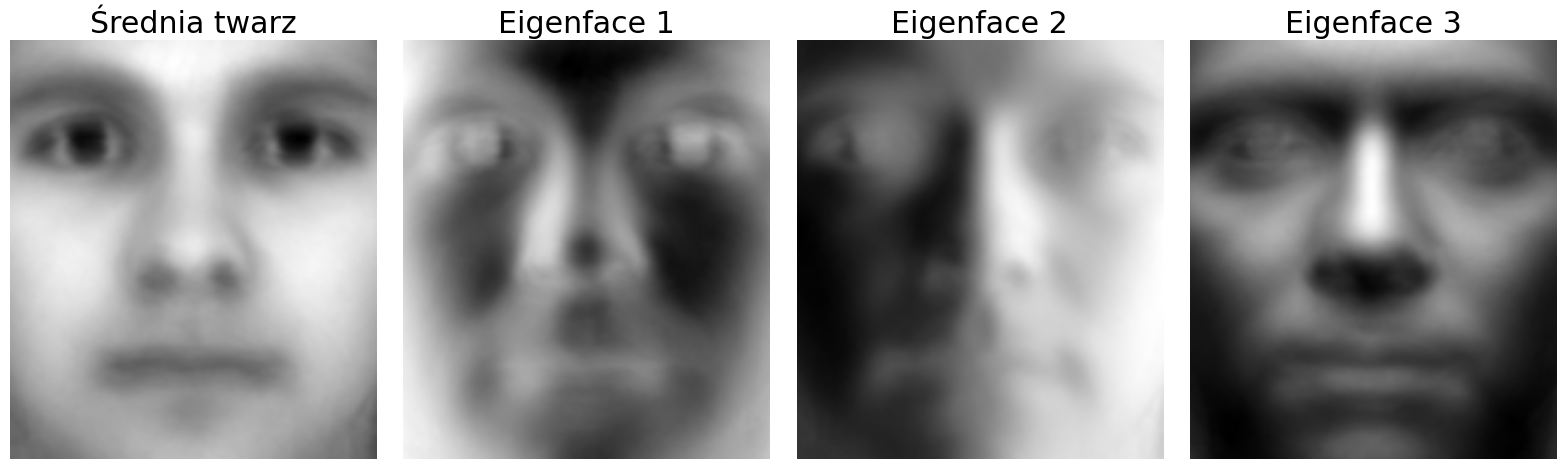

In [18]:
# ZADANIE: Znajdź r dla k = 30%
k = 0.30  # Procent informacji do zachowania

# minimalne r takie, że skumulowana wariancja >= k
r = np.argmax(cumsum_variance >= k) + 1

# Wyświetlenie pierwsze eigenfaces
fig = plt.figure(figsize=(16, 6))

# Średnia twarz
ax1 = fig.add_subplot(1, 4, 1)
img_avg = ax1.imshow(np.reshape(avgFace, (m, n)).T)
img_avg.set_cmap('gray')
ax1.set_title('Średnia twarz')
plt.axis('off')

# Pierwsze trzy eigenfaces
for i in range(3):
    ax = fig.add_subplot(1, 4, i + 2)
    eigenface = np.reshape(U[:, i], (m, n)).T
    img = ax.imshow(eigenface)
    img.set_cmap('gray')
    ax.set_title(f'Eigenface {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

Kształt obrazu testowego: (32256,)


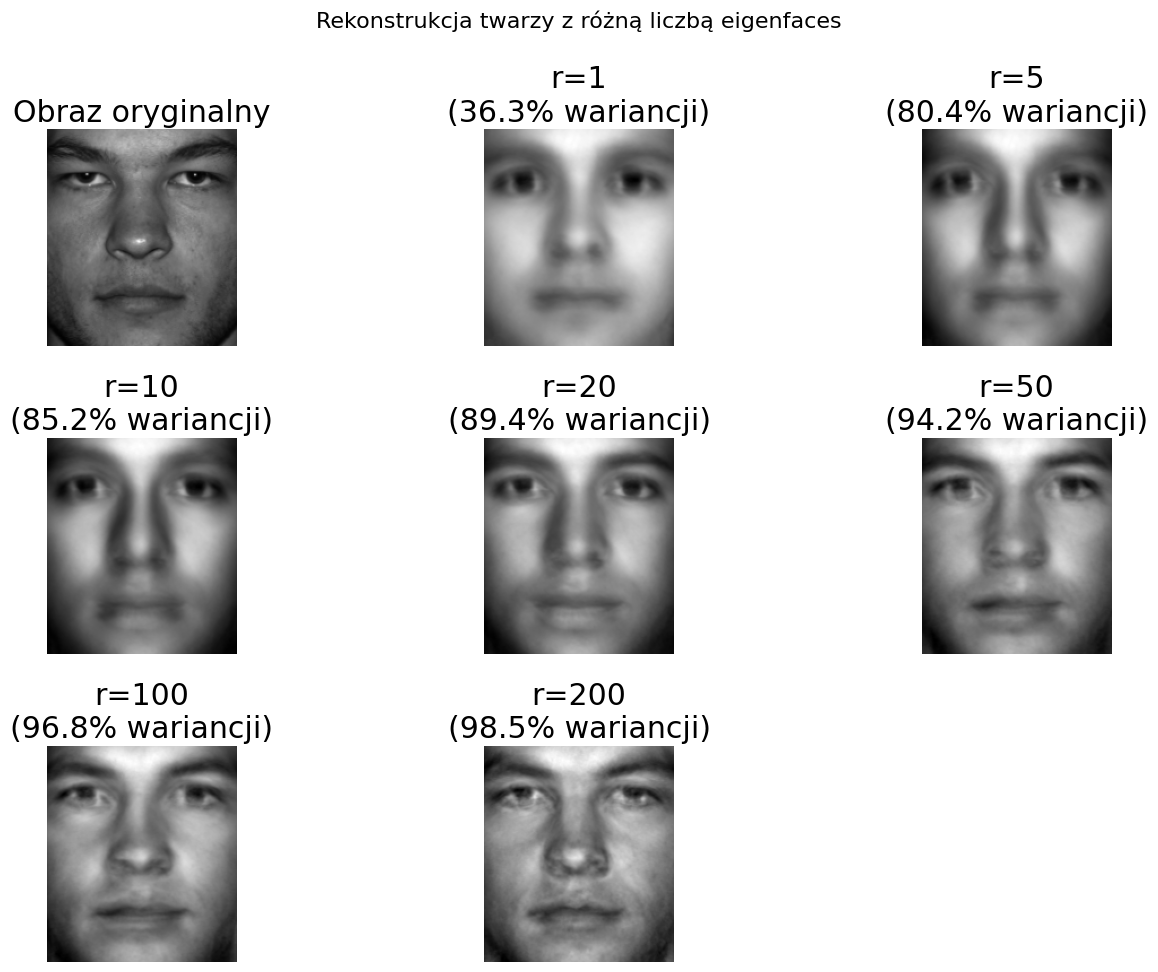

In [19]:
# Wczytanie testowego obrazu - pierwsza twarz osoby 37 (nie z zbioru treningowego)
testFace = faces[:, np.sum(nfaces[:36])]

print(f"Kształt obrazu testowego: {testFace.shape}")

# Oryginalny obraz testowy
fig = plt.figure(figsize=(14, 10))

ax_orig = fig.add_subplot(3, 3, 1)
ax_orig.imshow(np.reshape(testFace, (m, n)).T, cmap='gray')
ax_orig.set_title('Obraz oryginalny')
ax_orig.axis('off')

# Odjęcie średniej twarzy od testowego obrazu
testFaceMS = testFace - avgFace

# Obraz testowy z różnymi liczbami eigenfaces
r_values = [1, 5, 10, 20, 50, 100, 200]
position = 2

for idx, r_test in enumerate(r_values):
    reconFace = avgFace + U[:, :r_test] @ U[:, :r_test].T @ testFaceMS
    
    # Procent zachowanej wariancji dla tego r
    variance_retained = cumsum_variance[r_test - 1] * 100
    
    ax = fig.add_subplot(3, 3, idx + 2)
    ax.imshow(np.reshape(reconFace, (m, n)).T, cmap='gray')
    ax.set_title(f'r={r_test}\n({variance_retained:.1f}% wariancji)')
    ax.axis('off')

plt.suptitle('Rekonstrukcja twarzy z różną liczbą eigenfaces', fontsize=16)
plt.tight_layout()
plt.show()

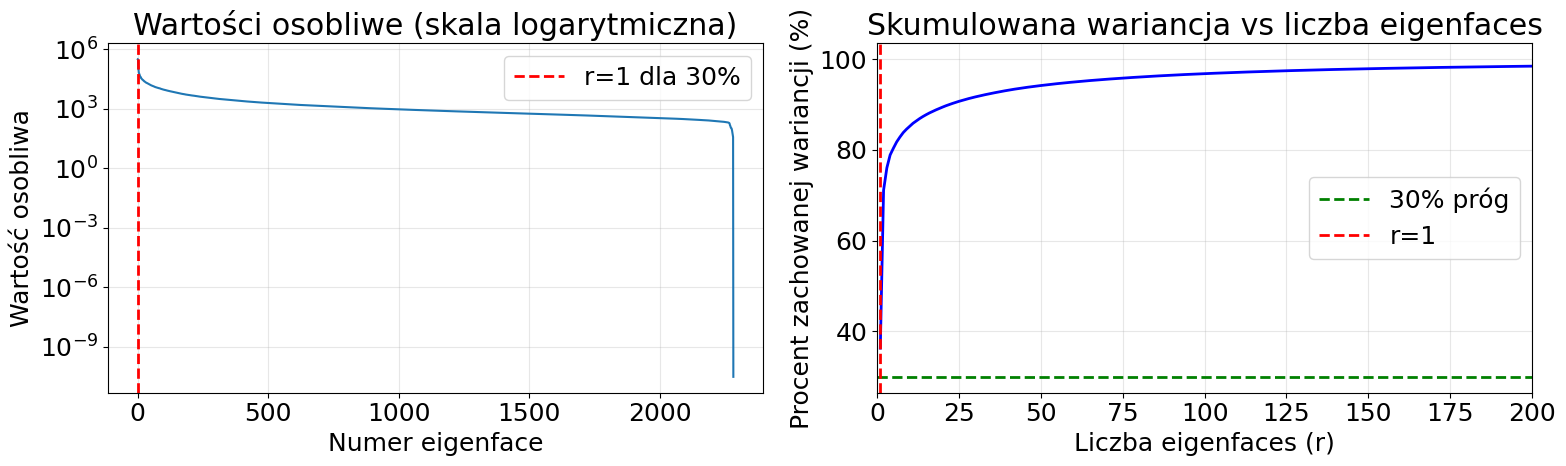

In [20]:
# Wykres: procent zachowanej wariancji vs liczba eigenfaces
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Wykres 1: Wartości osobliwe 
ax1.semilogy(np.arange(1, len(S)+1), S)
ax1.axvline(x=r, color='r', linestyle='--', linewidth=2, label=f'r={r} dla {k*100:.0f}%')
ax1.set_xlabel('Numer eigenface')
ax1.set_ylabel('Wartość osobliwa')
ax1.set_title('Wartości osobliwe (skala logarytmiczna)')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Wykres 2: Procent skumulowanej wariancji
ax2.plot(np.arange(1, len(cumsum_variance)+1), cumsum_variance * 100, 'b-', linewidth=2)
ax2.axhline(y=k*100, color='g', linestyle='--', linewidth=2, label=f'{k*100:.0f}% próg')
ax2.axvline(x=r, color='r', linestyle='--', linewidth=2, label=f'r={r}')
ax2.set_xlabel('Liczba eigenfaces (r)')
ax2.set_ylabel('Procent zachowanej wariancji (%)')
ax2.set_title('Skumulowana wariancja vs liczba eigenfaces')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_xlim(0, 200)

plt.tight_layout()
plt.show()

PODSUMOWANIE WYNIKÓW
Wariant zadania: k = 30%
Liczba eigenfaces potrzebnych: r = 1
Procent zachowanej wariancji: 36.34%
Procent wszystkich eigenfaces: 0.04%
Kompresja danych: 2282.0x


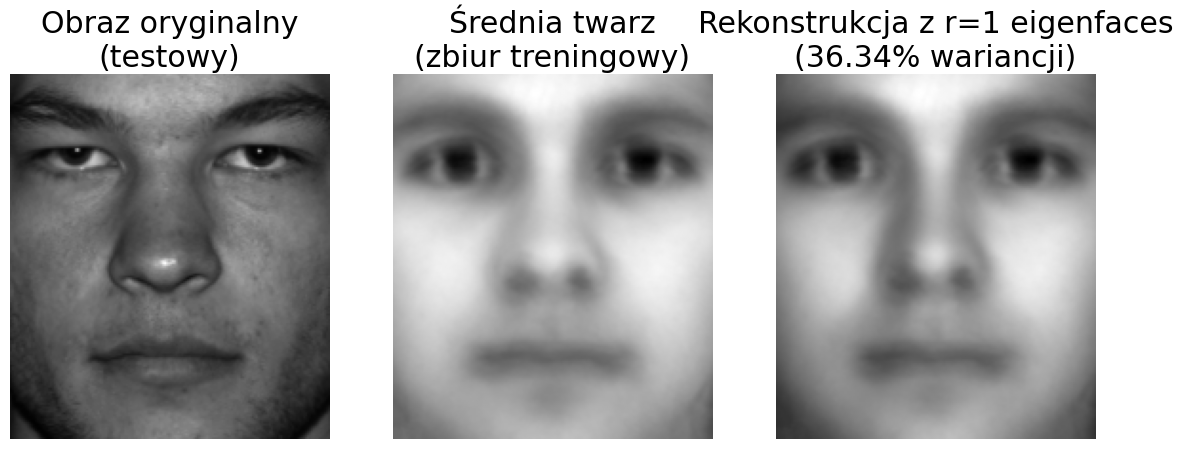

In [21]:
# Rekonstrukcja z r eigenfaces (dla k=30%)
fig = plt.figure(figsize=(14, 6))

# Obraz oryginalny
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(np.reshape(testFace, (m, n)).T, cmap='gray')
ax1.set_title('Obraz oryginalny\n(testowy)')
ax1.axis('off')

# Średnia twarz
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(np.reshape(avgFace, (m, n)).T, cmap='gray')
ax2.set_title('Średnia twarz\n(zbiur treningowy)')
ax2.axis('off')

# Rekonstrukcja z r eigenfaces
reconFace = avgFace + U[:, :r] @ U[:, :r].T @ testFaceMS
ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(np.reshape(reconFace, (m, n)).T, cmap='gray')
variance_retained = cumsum_variance[r - 1] * 100
ax3.set_title(f'Rekonstrukcja z r={r} eigenfaces\n({variance_retained:.2f}% wariancji)')
ax3.axis('off')

print("PODSUMOWANIE WYNIKÓW")
print(f"Wariant zadania: k = {k*100:.0f}%")
print(f"Liczba eigenfaces potrzebnych: r = {r}")
print(f"Procent zachowanej wariancji: {variance_retained:.2f}%")
print(f"Procent wszystkich eigenfaces: {r/len(S)*100:.2f}%")
print(f"Kompresja danych: {len(S)/r:.1f}x")